In [8]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from pylab import *

import json
import keras
import loadnotebook
from helper import * 

In [2]:
demo_config = {1 : [1, 2, 3, 4, 5, 6, 7], 
               2 : [1, 2, 3, 4, 5, 6],
               3 : [1, 2, 3, 4, 5, 6, 7],
               4 : [1, 2, 3, 4]}

df = get_data(config=demo_config, pure=True, refresh=False)
df_data = df
print(len(df_data))

helper.ipynb:492: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "    return result\n",


350721


# RSRP Prediction 

In [3]:
rsrp_data = df_data.drop(["RSRQ", "SNR", "priority", "set"], axis=1)
rsrp_data = rsrp_data.drop_duplicates()
rsrp_data

,location_x,location_y,PCI,RSRP,Power_301,Power_302,301_beam0,301_beam32,301_beam64,301_beam96,301_beam128,302_beam0,302_beam32,302_beam64,302_beam96,302_beam128,Distance_301,Distance_302,Angle_301,Angle_302
0,754.0,217.0,302,-96.4,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
1,754.0,217.0,302,-96.3,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
2,754.0,217.0,302,-93.0,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
3,754.0,217.0,302,-92.6,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
4,754.0,217.0,302,-93.4,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
5,754.0,217.0,302,-91.2,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
6,754.0,217.0,302,-91.0,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
7,754.0,217.0,302,-93.5,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
8,754.0,217.0,302,-96.6,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523
9,754.0,217.0,302,-88.8,-10,-10,1,0,0,0,0,1,0,0,0,0,115.412304,19.416488,98.972627,-124.508523


In [4]:
x_rsrp = rsrp_data.drop(["RSRP"], axis=1)
y_rsrp = np.array(rsrp_data.RSRP.values.tolist())
x_rsrp_train, x_rsrp_test, y_rsrp_train, y_rsrp_test = train_test_split(
    x_rsrp, y_rsrp, test_size=0.3, random_state=32)

## Data Visualization 

In [14]:
x_cut = 680  
y_cut = 100 
old_origin_img = cv2.imread('../image/map.png',0)
crop = old_origin_img[y_cut:318, x_cut:927]

## Training Visualization 

## Testing Visualization 

## Generate all to be predicted data 

In [15]:
def merge_with_pci_groundtruth(x_df, p, i, whitelist=[301, 302]) :
    pci_ground_truth = df_data[(df_data["priority"]==p) & (df_data["set"]==i)]
    pci_ground_truth = pci_ground_truth[pci_ground_truth["PCI"].isin(whitelist)]
    pci_ground_truth = pci_ground_truth[["location_x", "location_y", "PCI"]]
    pci_ground_truth = pci_ground_truth.drop_duplicates()
    pci_ground_truth["PCI"] = pci_ground_truth["PCI"].apply(lambda x : pci_encode[x])

    x_df = pd.merge(x_df, pci_ground_truth, on=["location_x", "location_y"], how="left")
    x_df["final_PCI"] = x_df["PCI_y"].fillna(x_df["PCI_x"])
    x_df = x_df[["location_x", "location_y", "final_PCI"]]
    x_df = x_df.rename(columns={"final_PCI":"PCI"})
    return x_df

x_coord_list = []
y_coord_list = []
pci_list = []
for lon in range(0, crop.shape[1]) :
    for lat in range(0, crop.shape[0]) :
        x_coord_list.append(x_cut + lon)
        y_coord_list.append(y_cut + lat)
        
predicted_set_config = {1 : [1, 2],
                        2 : [1, 3]}

In [16]:
all_y_pci = load_from_json("db/predicted_pci_keras.json")
all_x_rsrp_dict = generate_predicted_data_rsrp(predicted_set_config, x_coord_list, y_coord_list, all_y_pci)

helper.ipynb:524: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  "\n",


In [17]:
all_x_rsrp_dict[(1, 1)]

,location_x,location_y,PCI,Power_301,Power_302,301_beam0,301_beam32,301_beam64,301_beam96,301_beam128,302_beam0,302_beam32,302_beam64,302_beam96,302_beam128,Distance_301,Distance_302,Angle_301,Angle_302
0,680,100,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,212.473528,120.830460,62.228900,28.686148
1,680,101,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,212.009434,119.954158,62.468023,28.915424
2,680,102,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,211.549049,119.079805,62.708191,29.148072
3,680,103,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,211.092397,118.207445,62.949403,29.384157
4,680,104,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,210.639502,117.337121,63.191656,29.623749
5,680,105,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,210.190390,116.468880,63.434949,29.866917
6,680,106,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,209.745083,115.602768,63.679279,30.113733
7,680,107,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,209.303607,114.738834,63.924644,30.364271
8,680,108,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,208.865986,113.877127,64.171043,30.618605
9,680,109,1.0,-10,-10,1,0,0,0,0,1,0,0,0,0,208.432243,113.017698,64.418471,30.876813


## Tensorflow 

In [21]:
import tensorflow as tf 

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features.to_dict('list')), labels))

    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels=None, batch_size=None):
    features = features.to_dict('list')
    """An input function for evaluation or prediction"""
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)

    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    return dataset.make_one_shot_iterator().get_next()

## Tensorflow DNN Linear

In [19]:
import tensorflow as tf

rsrp_classifier = tf.estimator.DNNLinearCombinedRegressor(
    linear_feature_columns=[tf.feature_column.numeric_column(key=str(c)) for c in x_rsrp_train.columns],
    dnn_hidden_units=[64, 32, 8])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnndofu7h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe9394a8ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
rsrp_classifier.train(
    input_fn=lambda:train_input_fn(x_rsrp_train, y_rsrp_train, 32),
    steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpnndofu7h/model.ckpt.
INFO:tensorflow:loss = 392485.2, step = 1
INFO:tensorflow:global_step/sec: 477.393
INFO:tensorflow:loss = 23267.371, step = 101 (0.210 sec)
INFO:tensorflow:global_step/sec: 1204.6
INFO:tensorflow:loss = 12187.081, step = 201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1067.86
INFO:tensorflow:loss = 10787.425, step = 301 (0.094 sec)
INFO:tensorflow:global_step/sec: 1191.06
INFO:tensorflow:loss = 5860.3257, step = 401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1244.5
INFO:tensorflow:loss = 10081.45, step = 501 (0.080 sec)
INFO:tensorflow:global_step/sec: 1181.27
INFO:tensorflow:loss = 8460.936, step = 601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1150.13
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 1345.12
INFO:tensorflow:loss = 4842.9463, step = 8101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1312.53
INFO:tensorflow:loss = 4404.7163, step = 8201 (0.076 sec)
INFO:tensorflow:global_step/sec: 1291.68
INFO:tensorflow:loss = 4875.3984, step = 8301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1325.59
INFO:tensorflow:loss = 4619.4697, step = 8401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1358.44
INFO:tensorflow:loss = 7113.2354, step = 8501 (0.074 sec)
INFO:tensorflow:global_step/sec: 1322.58
INFO:tensorflow:loss = 3893.627, step = 8601 (0.076 sec)
INFO:tensorflow:global_step/sec: 1223.75
INFO:tensorflow:loss = 4087.4004, step = 8701 (0.082 sec)
INFO:tensorflow:global_step/sec: 1276.21
INFO:tensorflow:loss = 2341.3257, step = 8801 (0.079 sec)
INFO:tensorflow:global_step/sec: 1291.68
INFO:tensorflow:loss = 5673.8696, step = 8901 (0.077 sec)
INFO:tensorflow:global_step/sec: 1097.32
INFO:tensorflow:loss = 6816.2617, step = 9001 (0.091 sec)
INFO:tensor

In [23]:
# Evaluate the model.
rsrp_eval_result = rsrp_classifier.evaluate(
    input_fn=lambda:eval_input_fn(x_rsrp_test, y_rsrp_test, 30))

rsrp_eval_result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-12-08:09:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnndofu7h/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-12-08:09:18
INFO:tensorflow:Saving dict for global step 10000: average_loss = 155.40703, global_step = 10000, loss = 4659.7065


{'average_loss': 155.40703, 'loss': 4659.7065, 'global_step': 10000}

In [24]:
rsrp_est_tensor_predictions = {(p,s):rsrp_classifier.predict(
    input_fn=lambda:eval_input_fn(all_x_rsrp_dict[(p,s)], batch_size=10)) for p,s in all_x_rsrp_dict}

In [25]:
all_y_rsrp_tensor = {}
for key in rsrp_est_tensor_predictions :
    all_y_rsrp_tensor[key] = [p['predictions'][0] for p in rsrp_est_tensor_predictions[key]]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnndofu7h/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnndofu7h/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnndofu7h/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnndofu7h/model.ckpt-10000
INFO:te

In [26]:
for set_val in all_y_rsrp_tensor :
    y_pred = all_y_rsrp_tensor[set_val]
    print(str(set_val) + ":" + str(np.sum(y_pred)))

(1, 1):-6344561.0
(1, 2):-6344561.0
(2, 1):-6344561.0
(2, 3):-6344561.0


## Visualize Prediction 

In [72]:
all_y_rsrp = all_y_rsrp_tensor
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
x_coord_view = [lon-x_cut for lon in x_coord_list]
y_coord_view = [lat-y_cut for lat in y_coord_list]
normalize_rsrp = matplotlib.colors.Normalize(vmin=-140, vmax=-100)

-6344561.0


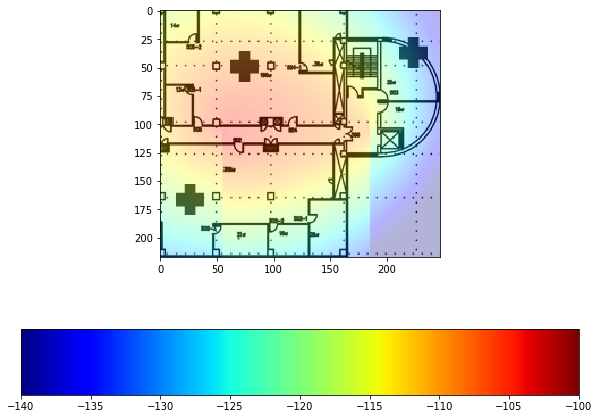

In [73]:
p, s = 1, 2

rsrp_pred = all_y_rsrp[key]
print(np.sum(rsrp_pred))
rsrp_pred = [cmap(normalize_rsrp(value))[:3] for value in rsrp_pred]
rsrp_pred = [[int(x*255) for x in value] for value in rsrp_pred]
    
filename = "../results/predicted/rsrp/priority_"+str(p)+"_set_"+str(s)+".png"
a=visualize_all_location_heatmap(np.array(crop), np.array(crop), x_coord_view, y_coord_view, 
                                 rsrp_pred, 
                                 cmap, normalize_rsrp, filename, 
                                 size=4, figsize=(10,10), adjustment=False)

In [74]:
save_to_pickle(all_y_rsrp, "predicted_rsrp_tensor")

-6344561.0


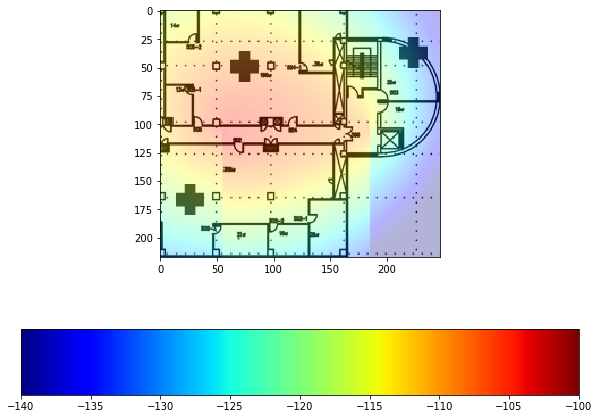

In [75]:
saved_all_y_rsrp = load_from_pickle("predicted_rsrp_tensor")
all_y_rsrp = saved_all_y_rsrp
crop = old_origin_img[y_cut:318, x_cut:927]
crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)
x_coord_view = [lon-x_cut for lon in x_coord_list]
y_coord_view = [lat-y_cut for lat in y_coord_list]
normalize_rsrp = matplotlib.colors.Normalize(vmin=-140, vmax=-100)
p, s = 1, 2

rsrp_pred = all_y_rsrp[key]
print(np.sum(rsrp_pred))
rsrp_pred = [cmap(normalize_rsrp(value))[:3] for value in rsrp_pred]
rsrp_pred = [[int(x*255) for x in value] for value in rsrp_pred]
    
filename = "../results/predicted/rsrp/priority_"+str(p)+"_set_"+str(s)+".png"
a=visualize_all_location_heatmap(np.array(crop), np.array(crop), x_coord_view, y_coord_view, 
                                 rsrp_pred, 
                                 cmap, normalize_rsrp, filename, 
                                 size=4, figsize=(10,10), adjustment=False)